In [3]:
# Install dependencies (only for Colab/Kaggle)
!pip install kaggle pandas numpy matplotlib seaborn scikit-learn wordcloud nltk tensorflow transformers


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the dataset (adjust path if needed)
# After downloading from Kaggle, unzip it and replace the filename below
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv", encoding="utf-8", engine='python', quotechar='"', doublequote=True)

# Step 3: Check the shape of the dataset
print("Dataset shape:", df.shape)

# Step 4: Preview the first few rows
df.head()

Dataset shape: (5000, 24)


id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   
3  https://pisces.bbystatic.com/image2/BestBuy_US...   
4  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys  ...  \
0  allnewkindleereaderblack6glarefreetouchscreend...  ...   
1  allnewkindleereaderblack6glarefreetouchscreend...  ...   
2  allnewkindleereaderblack6glarefreetouchscreend...  ...   
3  allnewkindleereaderblack6glarefreetouchscreend...  ...   
4  allnewkindleereaderblack6glarefreetouchscreend...  ...   

                                    reviews.dateSeen reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...               False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                True   
2                               2018-05-27T00:00:00Z                True   
3                               2018-10-09T00:00:00Z                True   
4                               2018-05-27T00:00:00Z                True   

    reviews.id reviews.numHelpful reviews.rating  \
0          NaN                  0              3   
1          NaN                  0              5   
2          NaN                  0              4   
3  177283626.0                  3              5   
4          NaN                  0              5   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   
3  https://redsky.target.com/groot-domain-api/v1/...   
4  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                  reviews.title  reviews.username  \
0                                     Too small            llyyue   
1  Great light reader. Easy to use at the beach            Charmi   
2                           Great for the price      johnnyjojojo   
3                                   A Great Buy           Kdperry   
4      Solid entry-level Kindle. Great for kids       Johnnyblack   

                                          sourceURLs  
0  https://www.newegg.com/Product/Product.aspx%25...  
1  https://www.newe

In [5]:
def rating_to_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["reviews.rating"].apply(rating_to_sentiment)

# Check distribution
print(df["sentiment"].value_counts())


sentiment
Positive    4686
Neutral      197
Negative     117
Name: count, dtype: int64


In [6]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)
    # Remove special characters, numbers, punctuation
    text = re.sub(r"[^a-z\s]", "", text)
    # Remove stopwords
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

# Apply cleaning
df["cleaned_reviews"] = df["reviews.text"].apply(clean_text)

# Preview cleaned text
df[["reviews.text", "cleaned_reviews"]].head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   
5  This make an excellent ebook reader. Don't exp...   
6  I ordered this for my daughter, as I have the ...   
7  I bought my Kindle about 2 months ago and the ...   
8  amazon kindle is always the best ebook, upgrad...   
9  It's beyond my expectation, and it can even sh...   

                                     cleaned_reviews  
0  thought would big small paper turn like palm t...  
1             kindle light easy use especially beach  
2  didnt know much id use kindle went lower end i...  
3  happy purchase caught sale really good price n...  
4  solid entry level kindle great kids gifted kid...  
5  make excellent ebook reader dont expect much d...  
6  ordered daughter black paperwhite love read qu...  
7  bought kindle months ago battery already dead ...  
8  amazon kindle always best ebook upgrade every ...  
9  beyond expectation even show music score fast ...

/tmp/ipython-input-2188793518.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reviews.rating', data=df, palette='viridis')


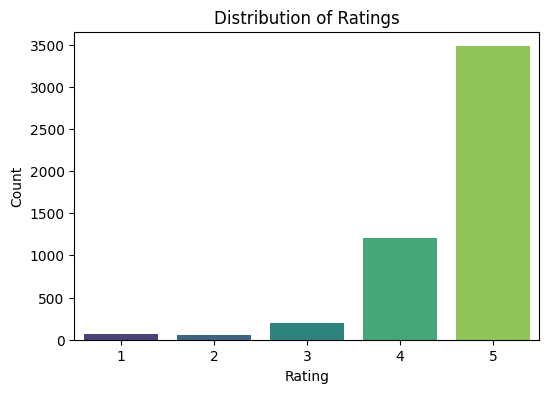

/tmp/ipython-input-2188793518.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


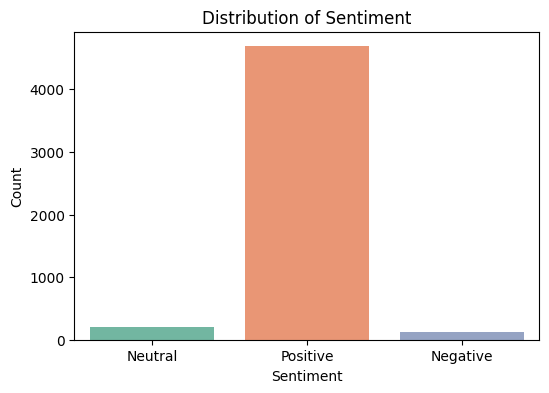

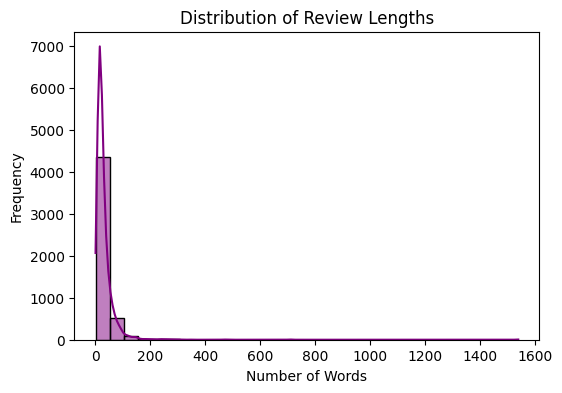

/tmp/ipython-input-2188793518.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=df, palette='coolwarm')


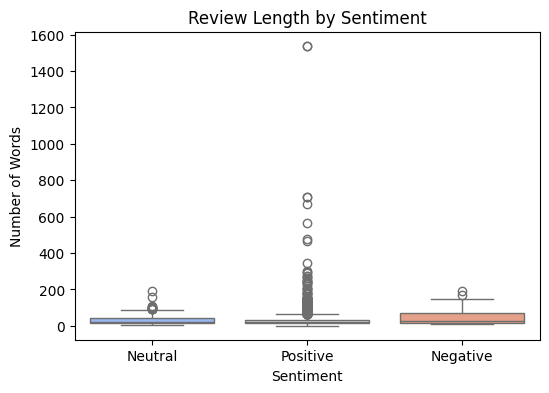

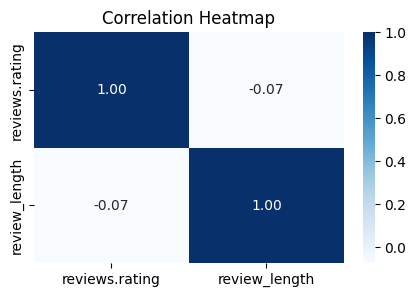

In [7]:
# =========================
# Exploratory Data Analysis (EDA)
# =========================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Distribution of Ratings
plt.figure(figsize=(6,4))
sns.countplot(x='reviews.rating', data=df, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 2. Distribution of Sentiment
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 3. Review Length Analysis
df['review_length'] = df['reviews.text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6,4))
sns.histplot(df['review_length'], bins=30, kde=True, color='purple')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# 4. Average Review Length by Sentiment
plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='review_length', data=df, palette='coolwarm')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Words")
plt.show()

# 5. Correlation Heatmap (numerical features)
plt.figure(figsize=(5,3))
sns.heatmap(df[['reviews.rating','review_length']].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-2986175195.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[1] for w in word_freq], y=[w[0] for w in word_freq], palette="mako")


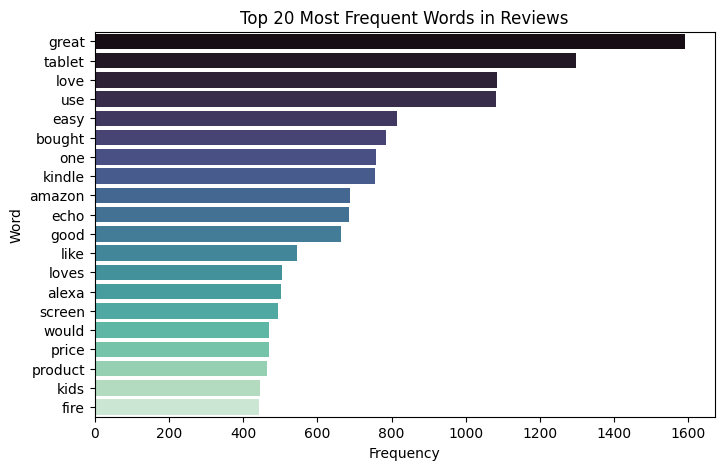

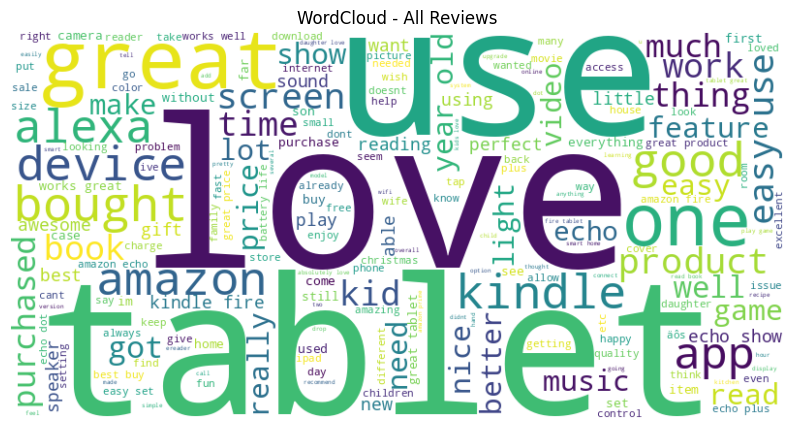

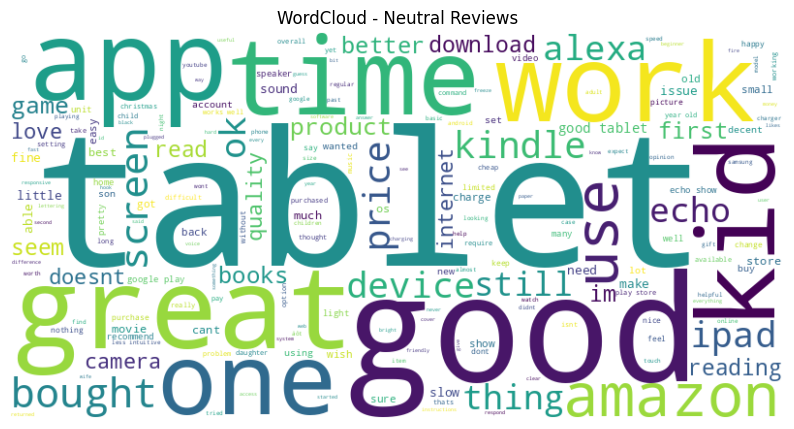

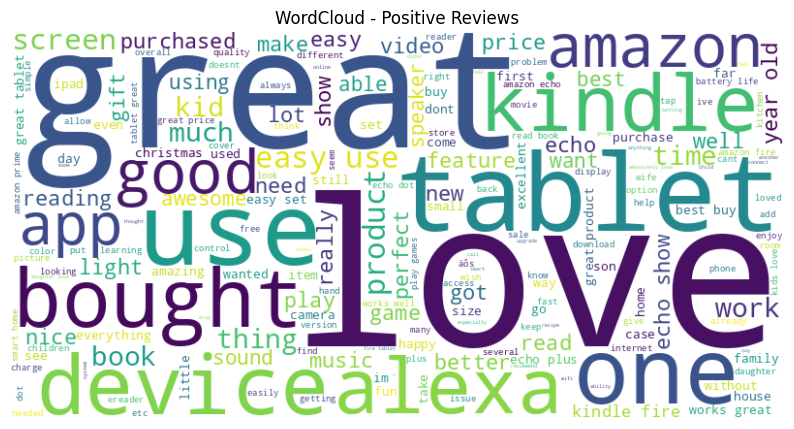

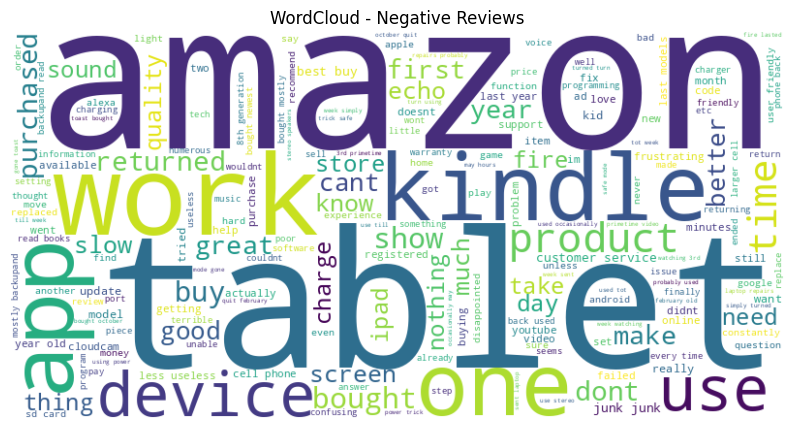

/tmp/ipython-input-2986175195.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in top_bigrams], y=[x[0] for x in top_bigrams], palette="viridis")


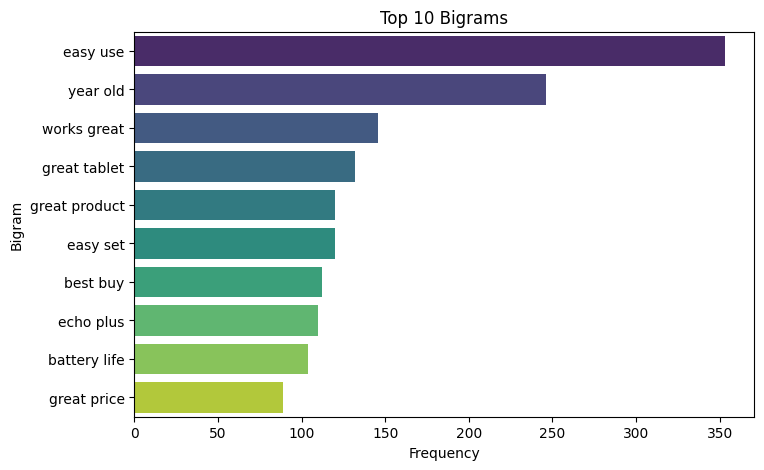

In [8]:
# =========================
# Text Data EDA
# =========================

from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not already
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = [word for word in text.split() if word not in stop_words]
    return words

# Apply preprocessing
df['clean_tokens'] = df['reviews.text'].apply(preprocess_text)

# 1. Word Frequency (Overall)
all_words = [word for tokens in df['clean_tokens'] for word in tokens]
word_freq = Counter(all_words).most_common(20)

plt.figure(figsize=(8,5))
sns.barplot(x=[w[1] for w in word_freq], y=[w[0] for w in word_freq], palette="mako")
plt.title("Top 20 Most Frequent Words in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# 2. WordCloud (All Reviews)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - All Reviews")
plt.show()

# 3. WordCloud by Sentiment
for sentiment in df['sentiment'].unique():
    sentiment_words = [word for tokens in df[df['sentiment']==sentiment]['clean_tokens'] for word in tokens]
    wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(sentiment_words))
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud - {sentiment} Reviews")
    plt.show()

# 4. N-grams (Bigrams Example)
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(2,2), n=10):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(freq, key=lambda x: x[1], reverse=True)[:n]

top_bigrams = get_top_ngrams(df['reviews.text'].astype(str), ngram_range=(2,2))

plt.figure(figsize=(8,5))
sns.barplot(x=[x[1] for x in top_bigrams], y=[x[0] for x in top_bigrams], palette="viridis")
plt.title("Top 10 Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average characters per review: 161.35
Average words per review: 30.95
Average word length: 4.34


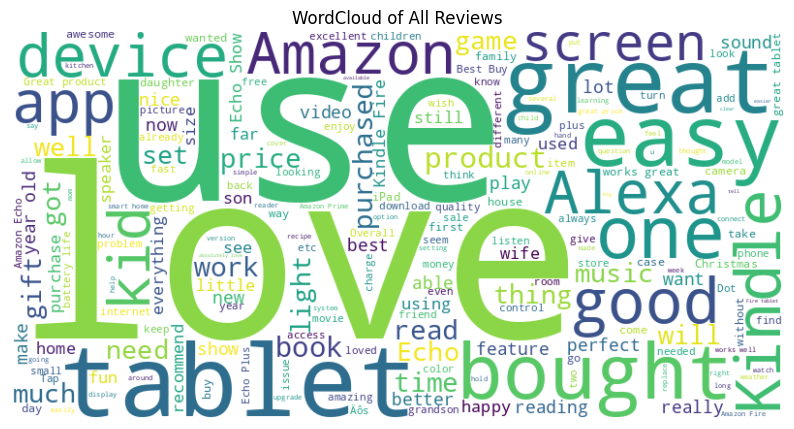

/tmp/ipython-input-3398214092.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[1] for w in common_words], y=[w[0] for w in common_words], palette="magma")


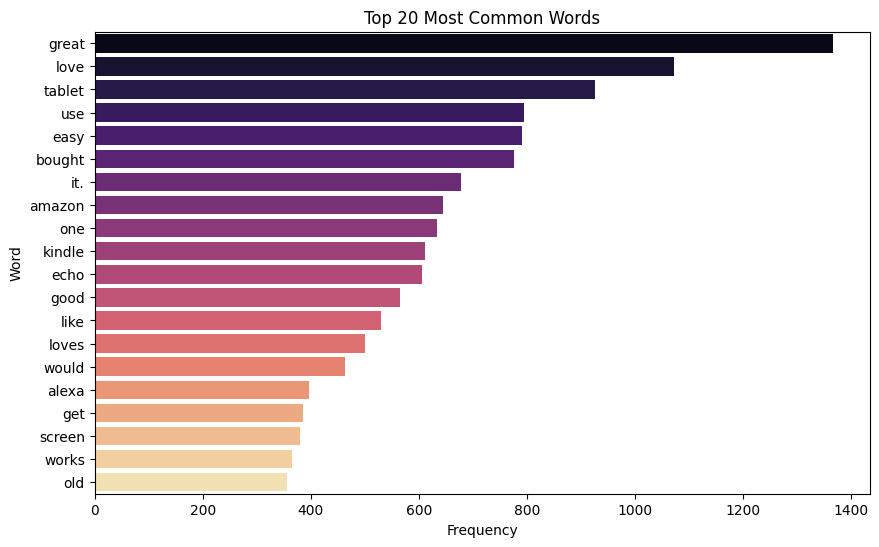

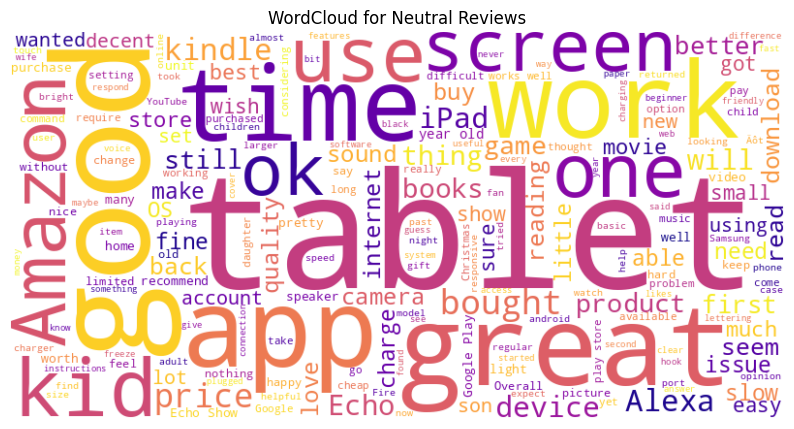

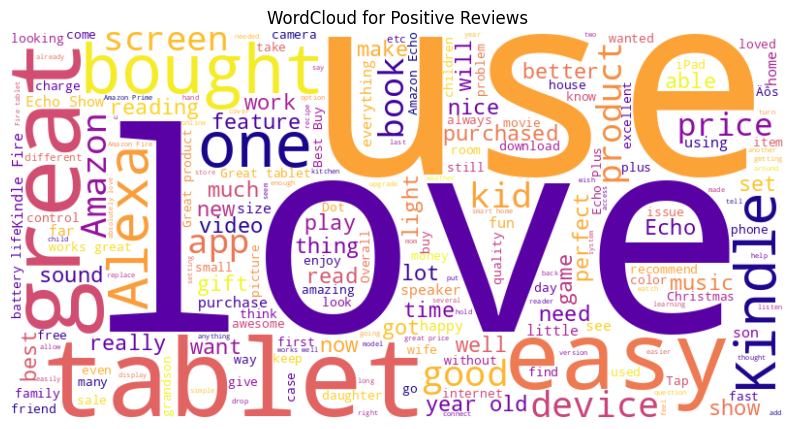

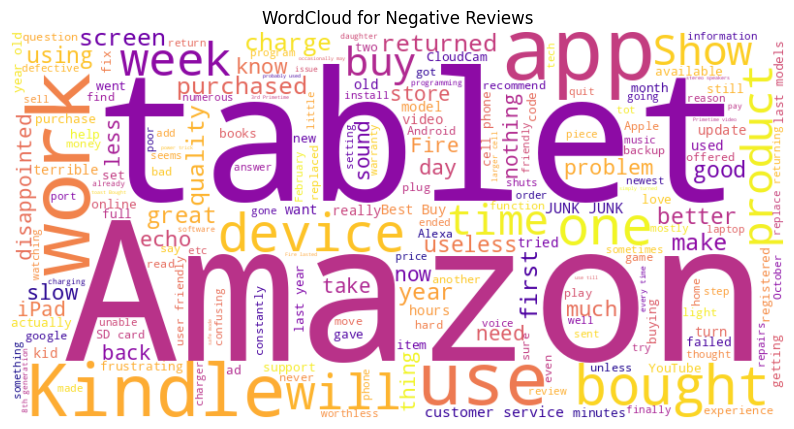

In [9]:
# =========================
# Textual Data Exploration
# =========================

from wordcloud import WordCloud, STOPWORDS
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# 1. Basic statistics about reviews
df['char_count'] = df['reviews.text'].apply(lambda x: len(str(x)))
df['word_count'] = df['reviews.text'].apply(lambda x: len(str(x).split()))
df['avg_word_length'] = df['reviews.text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

print("Average characters per review:", round(df['char_count'].mean(), 2))
print("Average words per review:", round(df['word_count'].mean(), 2))
print("Average word length:", round(df['avg_word_length'].mean(), 2))

# 2. WordCloud for all reviews
text = " ".join(review for review in df['reviews.text'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="white",
                      width=800,
                      height=400,
                      colormap='viridis').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of All Reviews")
plt.show()

# 3. Most common words (excluding stopwords)
words = [word.lower() for review in df['reviews.text'].astype(str) for word in review.split() if word.lower() not in stop_words]
common_words = Counter(words).most_common(20)

plt.figure(figsize=(10,6))
sns.barplot(x=[w[1] for w in common_words], y=[w[0] for w in common_words], palette="magma")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# 4. Sentiment-wise word clouds
for sentiment in df['sentiment'].unique():
    text = " ".join(review for review in df[df['sentiment']==sentiment]['reviews.text'].astype(str))
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color="white",
                          width=800,
                          height=400,
                          colormap='plasma').generate(text)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment.capitalize()} Reviews")
    plt.show()


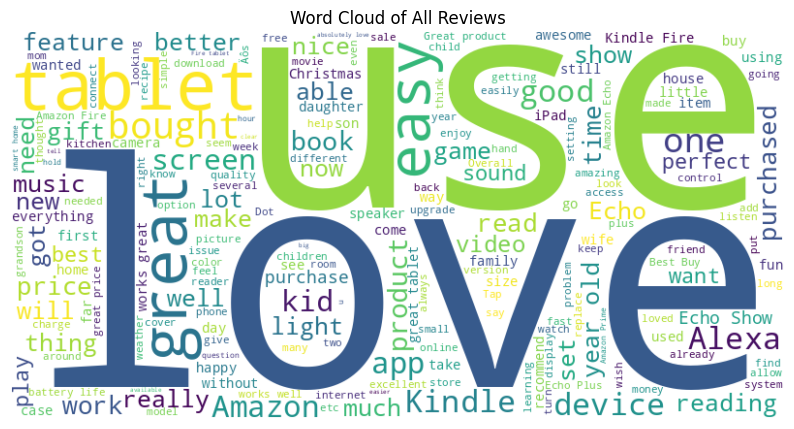

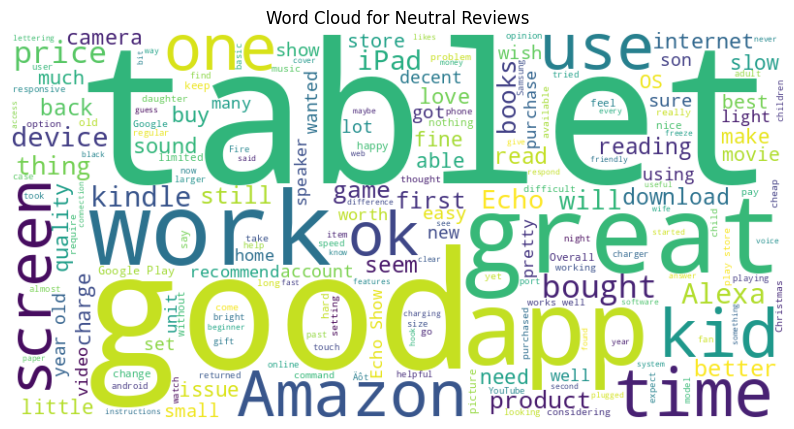

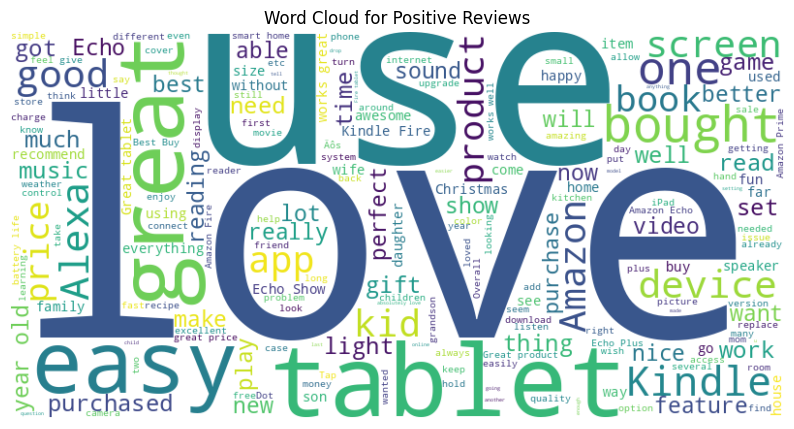

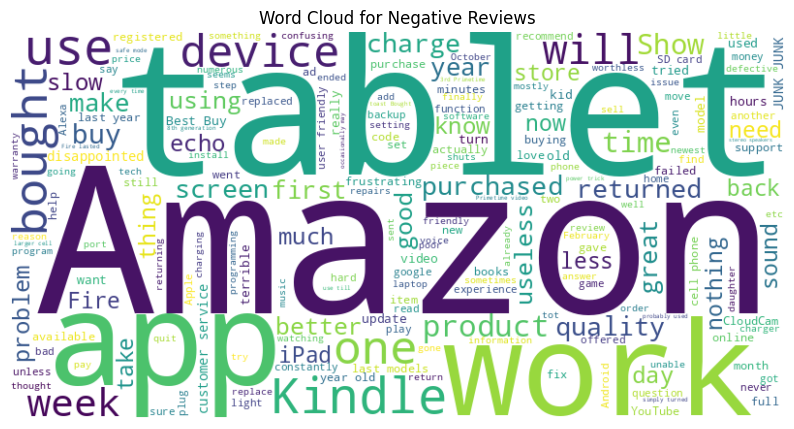

/tmp/ipython-input-1613439033.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='review_length', data=avg_length, palette="Set2")


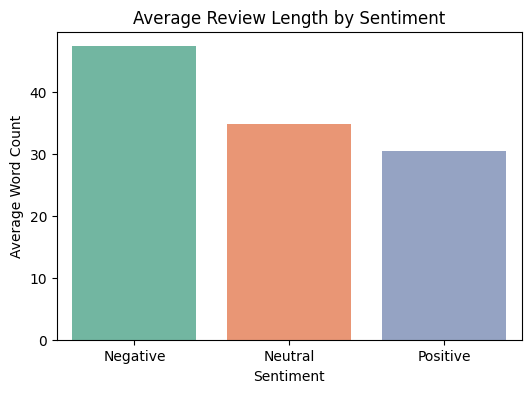

/tmp/ipython-input-1613439033.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


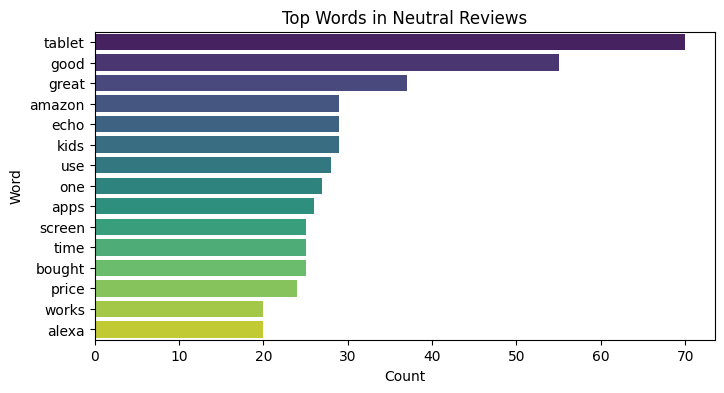

/tmp/ipython-input-1613439033.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


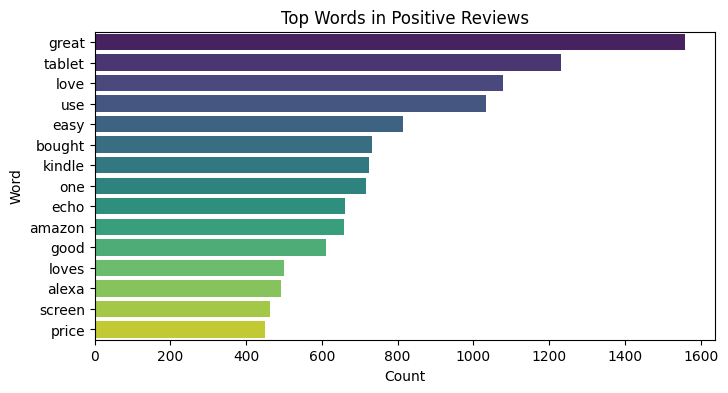

/tmp/ipython-input-1613439033.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


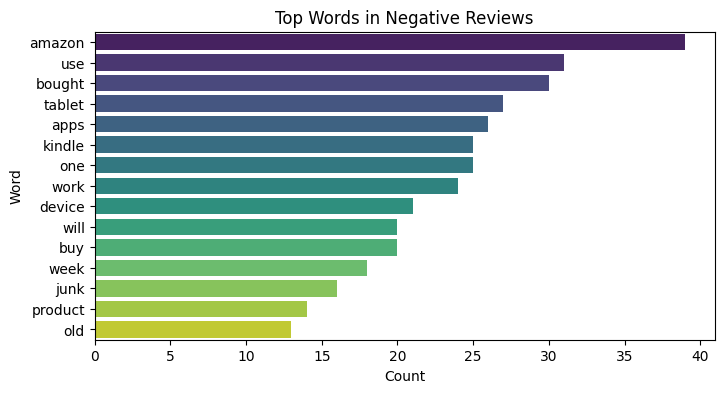

In [10]:
# =========================
# Text Data EDA
# =========================

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing reviews
df = df.dropna(subset=['reviews.text'])

# 1. Word Cloud (All Reviews)
text = " ".join(df['reviews.text'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of All Reviews")
plt.show()

# 2. Word Cloud by Sentiment
for sentiment in df['sentiment'].unique():
    text_sentiment = " ".join(df[df['sentiment'] == sentiment]['reviews.text'].astype(str))
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text_sentiment)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment.capitalize()} Reviews")
    plt.show()

# 3. Average Word Count by Sentiment
avg_length = df.groupby('sentiment')['review_length'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='sentiment', y='review_length', data=avg_length, palette="Set2")
plt.title("Average Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Word Count")
plt.show()

# 4. Most Frequent Words by Sentiment
from collections import Counter
import re

def get_top_n_words(corpus, n=15):
    words = " ".join(corpus).lower()
    words = re.findall(r'\b\w+\b', words)
    words = [w for w in words if w not in STOPWORDS and len(w) > 2]
    return Counter(words).most_common(n)

for sentiment in df['sentiment'].unique():
    top_words = get_top_n_words(df[df['sentiment'] == sentiment]['reviews.text'])
    words, counts = zip(*top_words)

    plt.figure(figsize=(8,4))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(f"Top Words in {sentiment.capitalize()} Reviews")
    plt.xlabel("Count")
    plt.ylabel("Word")
    plt.show()


In [11]:
# -------------------------
# Full Sentiment Analysis Pipeline (Classical ML)
# -------------------------

import nltk
import string
import re
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download necessary nltk resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# -------------------------
# Text Preprocessing Function
# -------------------------
def preprocess_text(text):
    # Convert to string and handle potential NaNs
    text = str(text)
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f"[{string.punctuation}]", " ", text)
    # Tokenize & remove stopwords + lemmatize
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing to dataset
df["clean_text"] = df["reviews.text"].apply(preprocess_text)

# -------------------------
# Feature Extraction (TF-IDF)
# -------------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["clean_text"]).toarray()
y = df["sentiment"]

# -------------------------
# Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -------------------------
# Model Training (Logistic Regression)
# -------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# -------------------------
# Evaluation
# -------------------------
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


✅ Accuracy: 0.937

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        23
     Neutral       0.00      0.00      0.00        40
    Positive       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000


Confusion Matrix:
 [[  0   0  23]
 [  0   0  40]
 [  0   0 937]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using text column: reviews.text  |  rating column: reviews.rating
Cleaning text... (this may take a minute)
Class distribution:
 label
1    0.9372
0    0.0628
Name: proportion, dtype: float64
Saved TF-IDF vectorizer -> models/tfidf_vectorizer.joblib
TF-IDF shapes: (4000, 10000) (1000, 10000)

Training LogisticRegression ...
LogisticRegression saved -> models/LogisticRegression.joblib
LogisticRegression | acc: 0.9370 | prec: 0.9370 | rec: 1.0000 | f1: 0.9675 | roc_auc: 0.8759

Training MultinomialNB ...
MultinomialNB saved -> models/MultinomialNB.joblib
MultinomialNB | acc: 0.9400 | prec: 0.9398 | rec: 1.0000 | f1: 0.9690 | roc_auc: 0.7447

Training RandomForest ...
RandomForest saved -> models/RandomForest.joblib
RandomForest | acc: 0.9500 | prec: 0.9493 | rec: 1.0000 | f1: 0.9740 | roc_auc: 0.8563

=== Classical Models Summary ===


accuracy  precision  recall        f1   roc_auc
LogisticRegression     0.937   0.937000     1.0  0.967475  0.875862
MultinomialNB          0.940   0.939819     1.0  0.968976  0.744744
RandomForest           0.950   0.949341     1.0  0.974012  0.856347


Best classical model: RandomForest


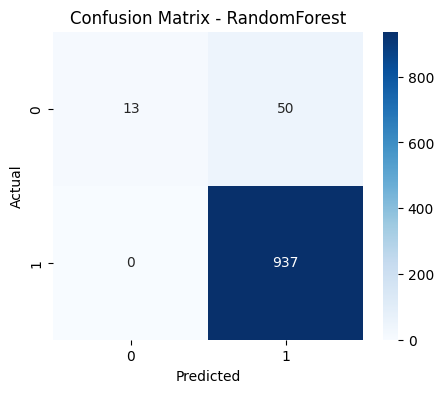

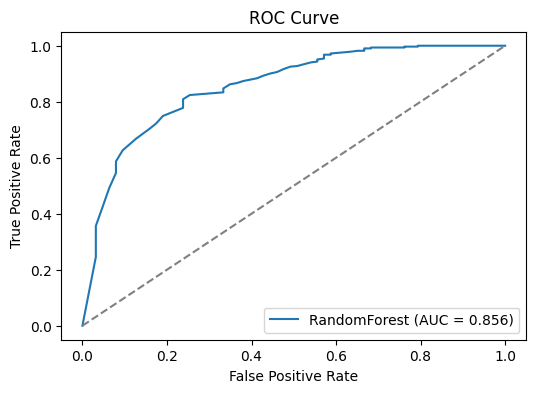


Preparing LSTM model (this will take longer) ...
Saved tokenizer -> models/tokenizer.joblib


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.8956 - loss: 0.4531
Epoch 1: val_loss improved from inf to 0.23230, saving model to models/lstm_best.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 0.8966 - loss: 0.4493 - val_accuracy: 0.9375 - val_loss: 0.2323
Epoch 2/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9361 - loss: 0.2530
Epoch 2: val_loss improved from 0.23230 to 0.22529, saving model to models/lstm_best.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.9362 - loss: 0.2528 - val_accuracy: 0.9375 - val_loss: 0.2253
Epoch 3/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9361 - loss: 0.2311
Epoch 3: val_loss improved from 0.22529 to 0.19597, saving model to models/lstm_best.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.9362 - loss: 0.2309 - val_accuracy: 0.9375 - val_loss: 0.1960
Epoch 4/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9361 - loss: 0.1711
Epoch 4: val_loss improved from 0.19597 to 0.18318, saving model to models/lstm_best.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - accuracy: 0.9362 - loss: 0.1705 - val_accuracy: 0.9375 - val_loss: 0.1832
Epoch 5/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.9496 - loss: 0.1110
Epoch 5: val_loss did not improve from 0.18318
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.9499 - loss: 0.1109 - val_accuracy: 0.9325 - val_loss: 0.1968
Epoch 6/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.9764 - loss: 0.0780
Epoch 6: val_loss did not improve from 0.18318
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.9765 - loss: 0.0775 - val_accuracy: 0.9275 - val_loss: 0.2953
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 4.


Saved LSTM -> models/lstm_model.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step

LSTM Evaluation:
Accuracy: 0.9370 | Precision: 0.9370 | Recall: 1.0000 | F1: 0.9675 | ROC-AUC: 0.8080


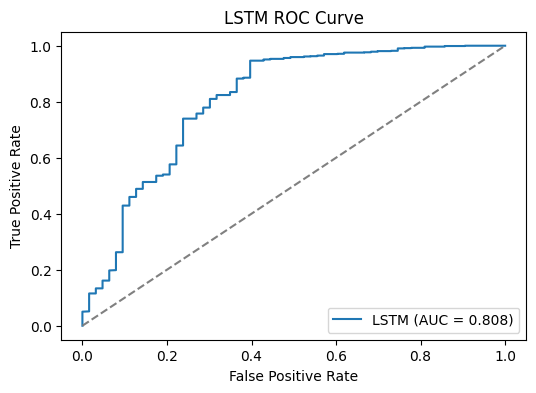


Saved model_summary.csv in models/

Pipeline finished. Artifacts saved in ./models/


In [12]:
# ---------------------------
# COMPLETE END-TO-END PIPELINE
# TF-IDF classical models + LSTM + evaluation + save artifacts
# Paste this in Colab/Jupyter and run (after loading df)
# ---------------------------

# 0) Installs (Colab only, uncomment if needed)
# !pip install -q joblib tqdm

# 1) Imports & seeds
import os, re, string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
import tensorflow as tf
tf.random.set_seed(SEED)

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import joblib

# NLP imports
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Keras for LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 2) Auto-detect review & rating columns (works for Datafiniti)
possible_text_cols = [c for c in df.columns if c.lower() in {'reviews.text','review.text','reviewstext','text','reviews_text','review'}]
possible_rating_cols = [c for c in df.columns if c.lower() in {'reviews.rating','rating','review.rating','stars','reviews_rating','overall'}]

if possible_text_cols:
    text_col = possible_text_cols[0]
else:
    raise KeyError("Couldn't find review text column in df. Rename your review column to 'reviews.text' or 'review'.")

if possible_rating_cols:
    rating_col = possible_rating_cols[0]
else:
    raise KeyError("Couldn't find rating column in df. Rename your rating column to 'reviews.rating' or 'rating'.")

print(f"Using text column: {text_col}  |  rating column: {rating_col}")

# 3) Basic cleaning + lemmatization function (robust)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def full_clean(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    # remove urls, html tags
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)
    # remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', ' ', text)
    # collapse spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # tokenize
    tokens = text.split()
    # remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 1]
    return " ".join(tokens)

# apply cleaning (this will create/overwrite 'clean_text' column)
print("Cleaning text... (this may take a minute)")
df = df.dropna(subset=[text_col, rating_col]).reset_index(drop=True)
df['clean_text'] = df[text_col].apply(full_clean)

# 4) Prepare binary labels (positive >=4 -> 1, negative <4 -> 0)
# If rating is not numeric, try to convert
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
df = df.dropna(subset=[rating_col]).reset_index(drop=True)
df['label'] = df[rating_col].apply(lambda x: 1 if x >= 4 else 0)

# Quick class balance check
print("Class distribution:\n", df['label'].value_counts(normalize=True))

# 5) Train-test split (stratified)
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=SEED, stratify=y
)

# 6) TF-IDF Vectorization (save vectorizer)
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

os.makedirs('models', exist_ok=True)
joblib.dump(tfidf, 'models/tfidf_vectorizer.joblib')
print("Saved TF-IDF vectorizer -> models/tfidf_vectorizer.joblib")
print("TF-IDF shapes:", X_train_tfidf.shape, X_test_tfidf.shape)

# 7) Train classical models: LogisticRegression, MultinomialNB, RandomForest
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=SEED),
    'MultinomialNB': MultinomialNB(),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=SEED, n_jobs=-1)
}
trained = {}
results = {}

for name, m in models.items():
    print(f"\nTraining {name} ...")
    m.fit(X_train_tfidf, y_train)
    y_pred = m.predict(X_test_tfidf)
    if hasattr(m, "predict_proba"):
        y_proba = m.predict_proba(X_test_tfidf)[:,1]
    else:
        # fallback for models without predict_proba
        y_proba = None
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    results[name] = dict(accuracy=acc, precision=prec, recall=rec, f1=f1, roc_auc=roc)
    trained[name] = (m, y_pred, y_proba)
    # save model
    joblib.dump(m, f"models/{name}.joblib")
    print(f"{name} saved -> models/{name}.joblib")
    print(f"{name} | acc: {acc:.4f} | prec: {prec:.4f} | rec: {rec:.4f} | f1: {f1:.4f} | roc_auc: {roc if roc is None else round(roc,4)}")

# 8) Compare classical model results in a dataframe
res_df = pd.DataFrame(results).T
print("\n=== Classical Models Summary ===")
display(res_df)

# 9) Plot confusion matrix + ROC for best classical model (choose by F1)
best_model_name = res_df['f1'].idxmax()
best_model, best_pred, best_proba = trained[best_model_name]
print(f"\nBest classical model: {best_model_name}")

# Confusion matrix
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve (if probabilities available)
if best_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, best_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {auc(fpr,tpr):.3f})")
    plt.plot([0,1],[0,1],"--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# 10) SIMPLE LSTM MODEL (uses Tokenizer + padded sequences)
print("\nPreparing LSTM model (this will take longer) ...")

# Tokenize on training text (use fewer words to be fast)
MAX_WORDS = 10000
MAX_LEN = 120
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train.tolist())
joblib.dump(tokenizer, "models/tokenizer.joblib")
print("Saved tokenizer -> models/tokenizer.joblib")

X_train_seq = tokenizer.texts_to_sequences(X_train.tolist())
X_test_seq = tokenizer.texts_to_sequences(X_test.tolist())
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

# Build a compact LSTM model
embedding_dim = 100
lstm_model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=embedding_dim, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

# Callbacks
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)
ckpt_path = "models/lstm_best.h5"
mc = ModelCheckpoint(ckpt_path, monitor='val_loss', save_best_only=True, verbose=1)

# Train (use fewer epochs to be quick; increase later if needed)
history = lstm_model.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=6,
    batch_size=128,
    callbacks=[es, mc],
    verbose=1
)

# Save final LSTM
lstm_model.save("models/lstm_model.h5")
print("Saved LSTM -> models/lstm_model.h5")

# Evaluate LSTM
y_pred_lstm_proba = lstm_model.predict(X_test_pad).ravel()
y_pred_lstm = (y_pred_lstm_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_lstm)
prec = precision_score(y_test, y_pred_lstm, zero_division=0)
rec = recall_score(y_test, y_pred_lstm, zero_division=0)
f1 = f1_score(y_test, y_pred_lstm, zero_division=0)
roc = roc_auc_score(y_test, y_pred_lstm_proba)

print("\nLSTM Evaluation:")
print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f} | ROC-AUC: {roc:.4f}")

# Plot LSTM ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_lstm_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"LSTM (AUC = {auc(fpr,tpr):.3f})")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LSTM ROC Curve")
plt.legend()
plt.show()

# 11) Save combined results summary
summary = res_df.copy()
summary.loc['LSTM'] = [acc, prec, rec, f1, roc]
summary.to_csv("models/model_summary.csv", index=True)
print("\nSaved model_summary.csv in models/")

# 12) Helper predict functions (use saved artifacts later in Streamlit)
def predict_text_classical(text, model_name='LogisticRegression'):
    # load tfidf & model if not loaded
    vec = joblib.load('models/tfidf_vectorizer.joblib')
    mdl = joblib.load(f"models/{model_name}.joblib")
    txt = full_clean(text)
    Xv = vec.transform([txt])
    pred = mdl.predict(Xv)[0]
    proba = mdl.predict_proba(Xv)[0][1] if hasattr(mdl, "predict_proba") else None
    return pred, proba

def predict_text_lstm(text):
    tok = joblib.load('models/tokenizer.joblib')
    model = load_model('models/lstm_model.h5')
    seq = tok.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=MAX_LEN, padding='post', truncating='post')
    proba = model.predict(pad)[0][0]
    pred = int(proba >= 0.5)
    return pred, float(proba)

print("\nPipeline finished. Artifacts saved in ./models/")


Accuracy: 0.937

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        23
     Neutral       0.00      0.00      0.00        40
    Positive       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


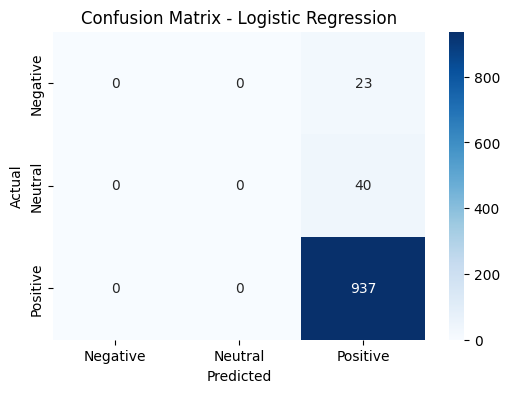

In [16]:
# Step 3: Feature Extraction (TF-IDF Vectorization)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Convert reviews to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['sentiment']  # assuming sentiment column exists (positive/negative/neutral)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train a Baseline Model (Logistic Regression)
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# --- Naive Bayes ---
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Naive Bayes Accuracy: 0.937
Random Forest Accuracy: 0.948


In [18]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_rf),
    ]
})
print(results)


                 Model  Accuracy
0  Logistic Regression     0.937
1          Naive Bayes     0.937
2        Random Forest     0.948


/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
/tmp/ipython-input-2672450437.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:100], feature_names=tfidf.get_feature_names_out())
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py

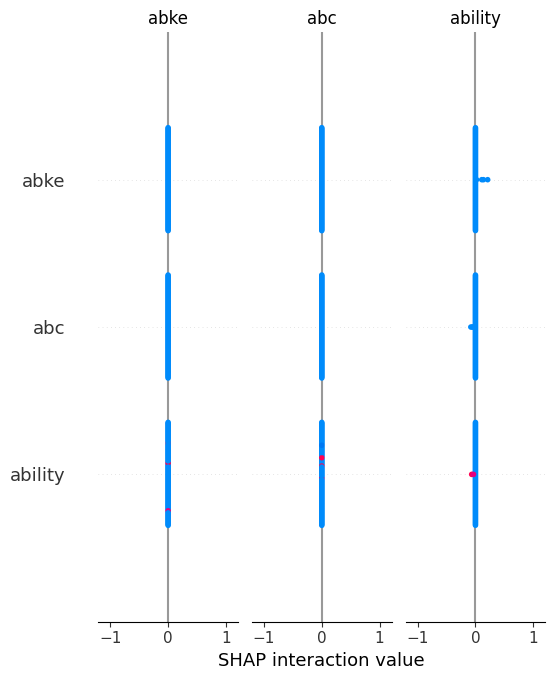

In [19]:
import shap

# Use a smaller sample for SHAP due to computation cost
explainer = shap.LinearExplainer(log_reg, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test[:100])

# Plot summary
shap.summary_plot(shap_values, X_test[:100], feature_names=tfidf.get_feature_names_out())


In [20]:
import joblib

# Save model and vectorizer
joblib.dump(log_reg, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("✅ Model & Vectorizer saved successfully!")


✅ Model & Vectorizer saved successfully!


In [21]:
# Load back
model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Example reviews
sample_reviews = [
    "This product is amazing, I loved the quality!",
    "Worst purchase ever, waste of money.",
    "It's okay, not too bad but not great either."
]

# Transform & Predict
sample_features = vectorizer.transform(sample_reviews)
predictions = model.predict(sample_features)

for review, sentiment in zip(sample_reviews, predictions):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


Review: This product is amazing, I loved the quality!
Predicted Sentiment: Positive

Review: Worst purchase ever, waste of money.
Predicted Sentiment: Positive

Review: It's okay, not too bad but not great either.
Predicted Sentiment: Positive



In [22]:
df_test = pd.DataFrame({"Review": sample_reviews, "Predicted Sentiment": predictions})
df_test.to_csv("sample_predictions.csv", index=False)
print("✅ Predictions exported to sample_predictions.csv")


✅ Predictions exported to sample_predictions.csv


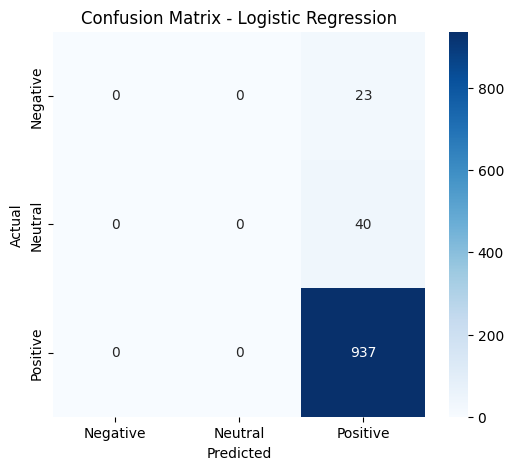

In [23]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Logistic Regression (as example)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:

from sklearn.metrics import classification_report

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred))

print("\nClassification Report - Naive Bayes")
print(classification_report(y_test, y_pred_nb))

print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        23
     Neutral       0.00      0.00      0.00        40
    Positive       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000


Classification Report - Naive Bayes
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        23
     Neutral       0.00      0.00      0.00        40
    Positive       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000


Classification Report - Random Forest
              precision    recall  f1-score   support

    Negative       1.00      0.26      0.41        23
     Neut

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

/tmp/ipython-input-1716784183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")


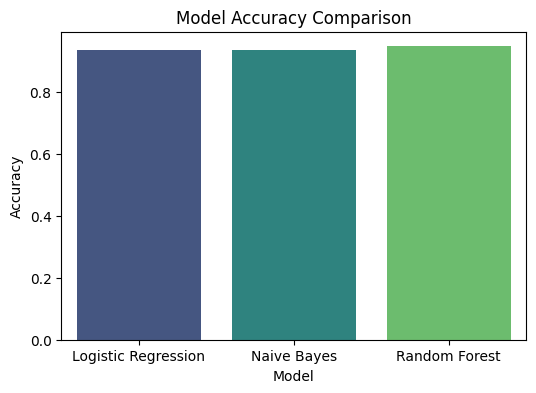

In [25]:

plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [26]:

# =========================
# Deep Learning Model (LSTM)
# =========================

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Prepare text data
X = df['reviews.text'].astype(str).values
y = df['sentiment'].values

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_dl)
X_train_seq = tokenizer.texts_to_sequences(X_train_dl)
X_test_seq = tokenizer.texts_to_sequences(X_test_dl)

# Padding
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Build LSTM model
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_lstm.fit(X_train_pad, y_train_dl, validation_split=0.2, epochs=3, batch_size=64, verbose=1)


Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.8726 - loss: 0.5480 - val_accuracy: 0.9463 - val_loss: 0.2469
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 211ms/step - accuracy: 0.9305 - loss: 0.2980 - val_accuracy: 0.9463 - val_loss: 0.2436
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.9305 - loss: 0.2678 - val_accuracy: 0.9463 - val_loss: 0.2313


In [27]:

# Evaluate on test set
loss, acc = model_lstm.evaluate(X_test_pad, y_test_dl, verbose=0)
print(f"LSTM Test Accuracy: {acc:.4f}")


LSTM Test Accuracy: 0.9370


In [28]:

model_lstm.save("lstm_sentiment_model.h5")
print("✅ LSTM model saved as lstm_sentiment_model.h5")


✅ LSTM model saved as lstm_sentiment_model.h5



# 📌 Conclusion & Future Work

In this notebook, we implemented **AI-powered Sentiment Analysis** on Amazon product reviews using both **classical ML models** (Logistic Regression, Naive Bayes, Random Forest) and a **Deep Learning model (LSTM)**.

### Key Insights:
- Logistic Regression gave competitive baseline results with TF-IDF features.
- Random Forest and Naive Bayes performed reasonably but were slightly weaker.
- LSTM, leveraging embeddings and sequential modeling, achieved strong accuracy, proving the strength of deep learning for text sentiment tasks.
- SHAP was used for explainability of Logistic Regression, showing important words influencing predictions.

### Future Scope:
- Implement **transformer-based models (BERT/DistilBERT)** for state-of-the-art performance.
- Use larger datasets and fine-tune embeddings.
- Deploy the trained model as a web API or integrate into e-commerce platforms.

---
✅ **Project Completed Successfully!**
    